In [1]:
## load necessary packages
using JLD2, Plots, LaTeXStrings, Measures
default(tickfontsize=16,labelfontsize=14,titlefontsize=16,legendfontsize=12,minorticks=true,margins=5mm,)
using LsqFit, FFTW, ForwardDiff, SpecialFunctions

# Figure 3: Linear Response

η, A : [0.26987213291935974, 0.6152362384498482]


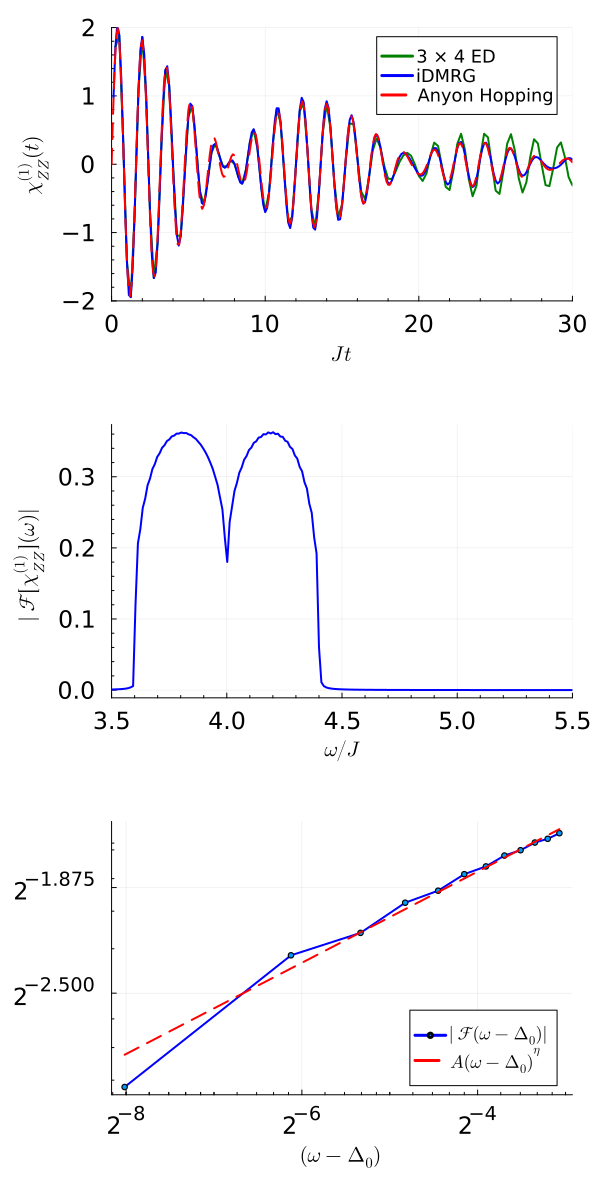

In [3]:
## Load data
tarr_ED, chi1_ED = load_object("Fig3/Linear-Response_ED.jld2")
tarr_DMRG, chi1_DMRG = load_object("Fig3/Linear-Response_iDMRG.jld2")
tarr_a_small, chi1_a_small = load_object("Fig3/Linear-Response_anyon-hopping_3x20-cyl.jld2")
tarr_a_big, chi1_a_big = load_object("Fig3/Linear-Response_anyon-hopping_100x100-torus.jld2")

## Extend data to negative times to smooth Fourier transform features
tarr_ext = cat(-reverse(tarr_a_big), cat([0.], tarr_a_big, dims=1),dims=1);
chi1_ext = cat(-reverse(chi1_a_big), cat([0.], chi1_a_big, dims=1),dims=1);

## compute Fourier transform and Fourier frequencies
warr = fftshift(fftfreq(length(tarr_ext), 2π/(tarr_ext[end]-tarr_ext[end-1]) ));
farr = fftshift(fft(chi1_ext))/100;

############################################

chi1_tplot = plot(
    xlabel = L"Jt", xlims = (0,30), 
    ylabel = L"\chi^{(1)}_{ZZ}(t)", ylims = (-2.,2.),
)
plot!(tarr_ED, chi1_ED, label = "3 × 4 ED", lw = 2, lc = :green)
plot!(tarr_DMRG, chi1_DMRG, label = "iDMRG", lw = 2, lc = :blue)
plot!(tarr_a_small, chi1_a_small, label = "Anyon Hopping", lw = 2, lc = :red, ls = :dash)

############################################

chi1_fplot = plot(warr, abs.(farr), label = L"|\mathcal{F}(\omega)|", lw = 2, lc = :blue,
    xlabel = L"\omega/J",
    ylabel = L"|\mathcal{F}[\chi^{(1)}_{ZZ}](\omega)|",
    xlims = (3.5, 5.5),
    legend = :none
)

## Extract data for power law fitting
wmin = 3.6; wmax = 100
xdata0 = warr[wmin.<=warr.<=wmax] .- wmin;
ydata0 = abs.(farr[wmin.<=warr.<=wmax]);

xdata = (xdata0[1:12]);
ydata = (ydata0[1:12]);

## fit data to power law 
powerlaw(x,c) = c[2].*x.^c[1];
power_fit = curve_fit(powerlaw, xdata, ydata, [-1.,1.]);
println("η, A : ", power_fit.param);

############################################

inset = plot(xdata, ydata, label = L"|\mathcal{F}(\omega-\Delta_0)|", lw = 2, lc = :blue, m = 3,
    xlabel = L"(\omega-\Delta_0)",
    ylabel = L"|\mathcal{F}[\chi^{(1)}_{ZZ}](\omega)|",
    xaxis = :log2, yaxis = :log2,
)
plot!(xdata, powerlaw(xdata, power_fit.param), label = L"A(\omega-\Delta_0)^\eta", lc = :red, lw = 2, ls = :dash,
    legend = :bottomright,
)

plot(chi1_tplot, chi1_fplot, inset, layout = (3,1), size = (600,1200))

# Figure 4: 3rd-Order Nonlinear Response 

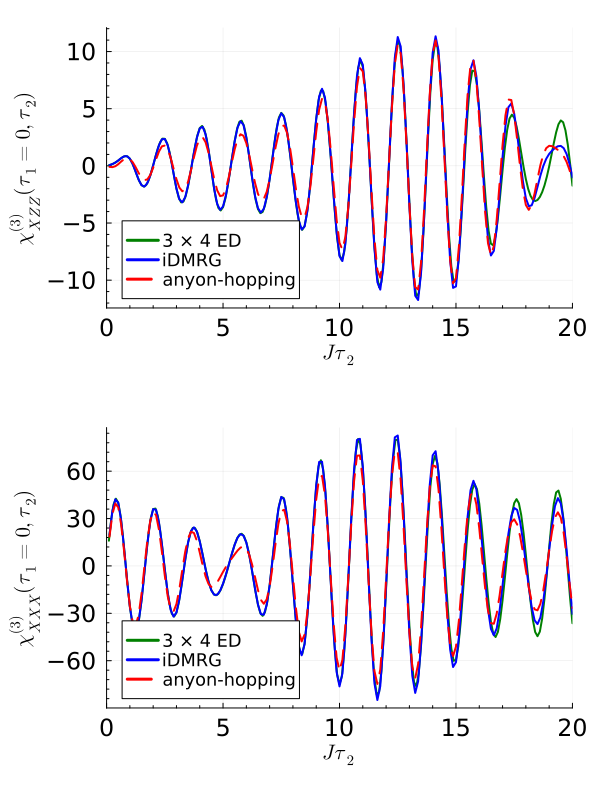

In [5]:
## Load data
tarr_XZZ_ED, chi3_XZZ_ED = load_object("Fig4/chi3_XZZ_ED.jld2");
tarr_XZZ_DMRG, chi3_XZZ_DMRG = load_object("Fig4/chi3_XZZ_DMRG.jld2");
tarr_XZZ_a_small, chi3_XZZ_a_small = load_object("Fig4/chi3_XZZ_anyon_3x12-cyl.jld2");

tarr_XXX_ED, chi3_XXX_ED = load_object("Fig4/chi3_XXX_ED.jld2");
tarr_XXX_DMRG, chi3_XXX_DMRG = load_object("Fig4/chi3_XXX_DMRG.jld2");
tarr_XXX_a_small, chi3_XXX_a_small = load_object("Fig4/chi3_XXX_anyon_3x12-cyl.jld2");

############################################

chi3_XZZ_plot = plot(
    xlabel = L"J\tau_2", xlims = (0,20),
    ylabel = L"\chi^{(3)}_{XZZ}(\tau_1=0,\tau_2)",
    legend = :bottomleft,
)
plot!(tarr_XZZ_ED, chi3_XZZ_ED, label = "3 × 4 ED", lw = 2, lc = :green)
plot!(tarr_XZZ_DMRG, chi3_XZZ_DMRG, label = "iDMRG", lw = 2, lc = :blue)
plot!(tarr_XZZ_a_small, chi3_XZZ_a_small, label = "anyon-hopping", lw = 2, lc = :red, ls = :dash)

############################################

chi3_XXX_plot = plot(
    xlabel = L"J\tau_2", xlims = (0,20),
    ylabel = L"\chi^{(3)}_{XXX}(\tau_1=0,\tau_2)",
    legend = :bottomleft,
)
plot!(tarr_XXX_ED, chi3_XXX_ED, label = "3 × 4 ED", lw = 2, lc = :green)
plot!(tarr_XXX_DMRG, chi3_XXX_DMRG, label = "iDMRG", lw = 2, lc = :blue)
plot!(tarr_XXX_a_small, chi3_XXX_a_small, label = "anyon-hopping", lw = 2, lc = :red, ls = :dash)

plot(chi3_XZZ_plot, chi3_XXX_plot, layout = (2,1), size = (600,800))

# Figure 5: Anyon-Hopping Nonlinear Response

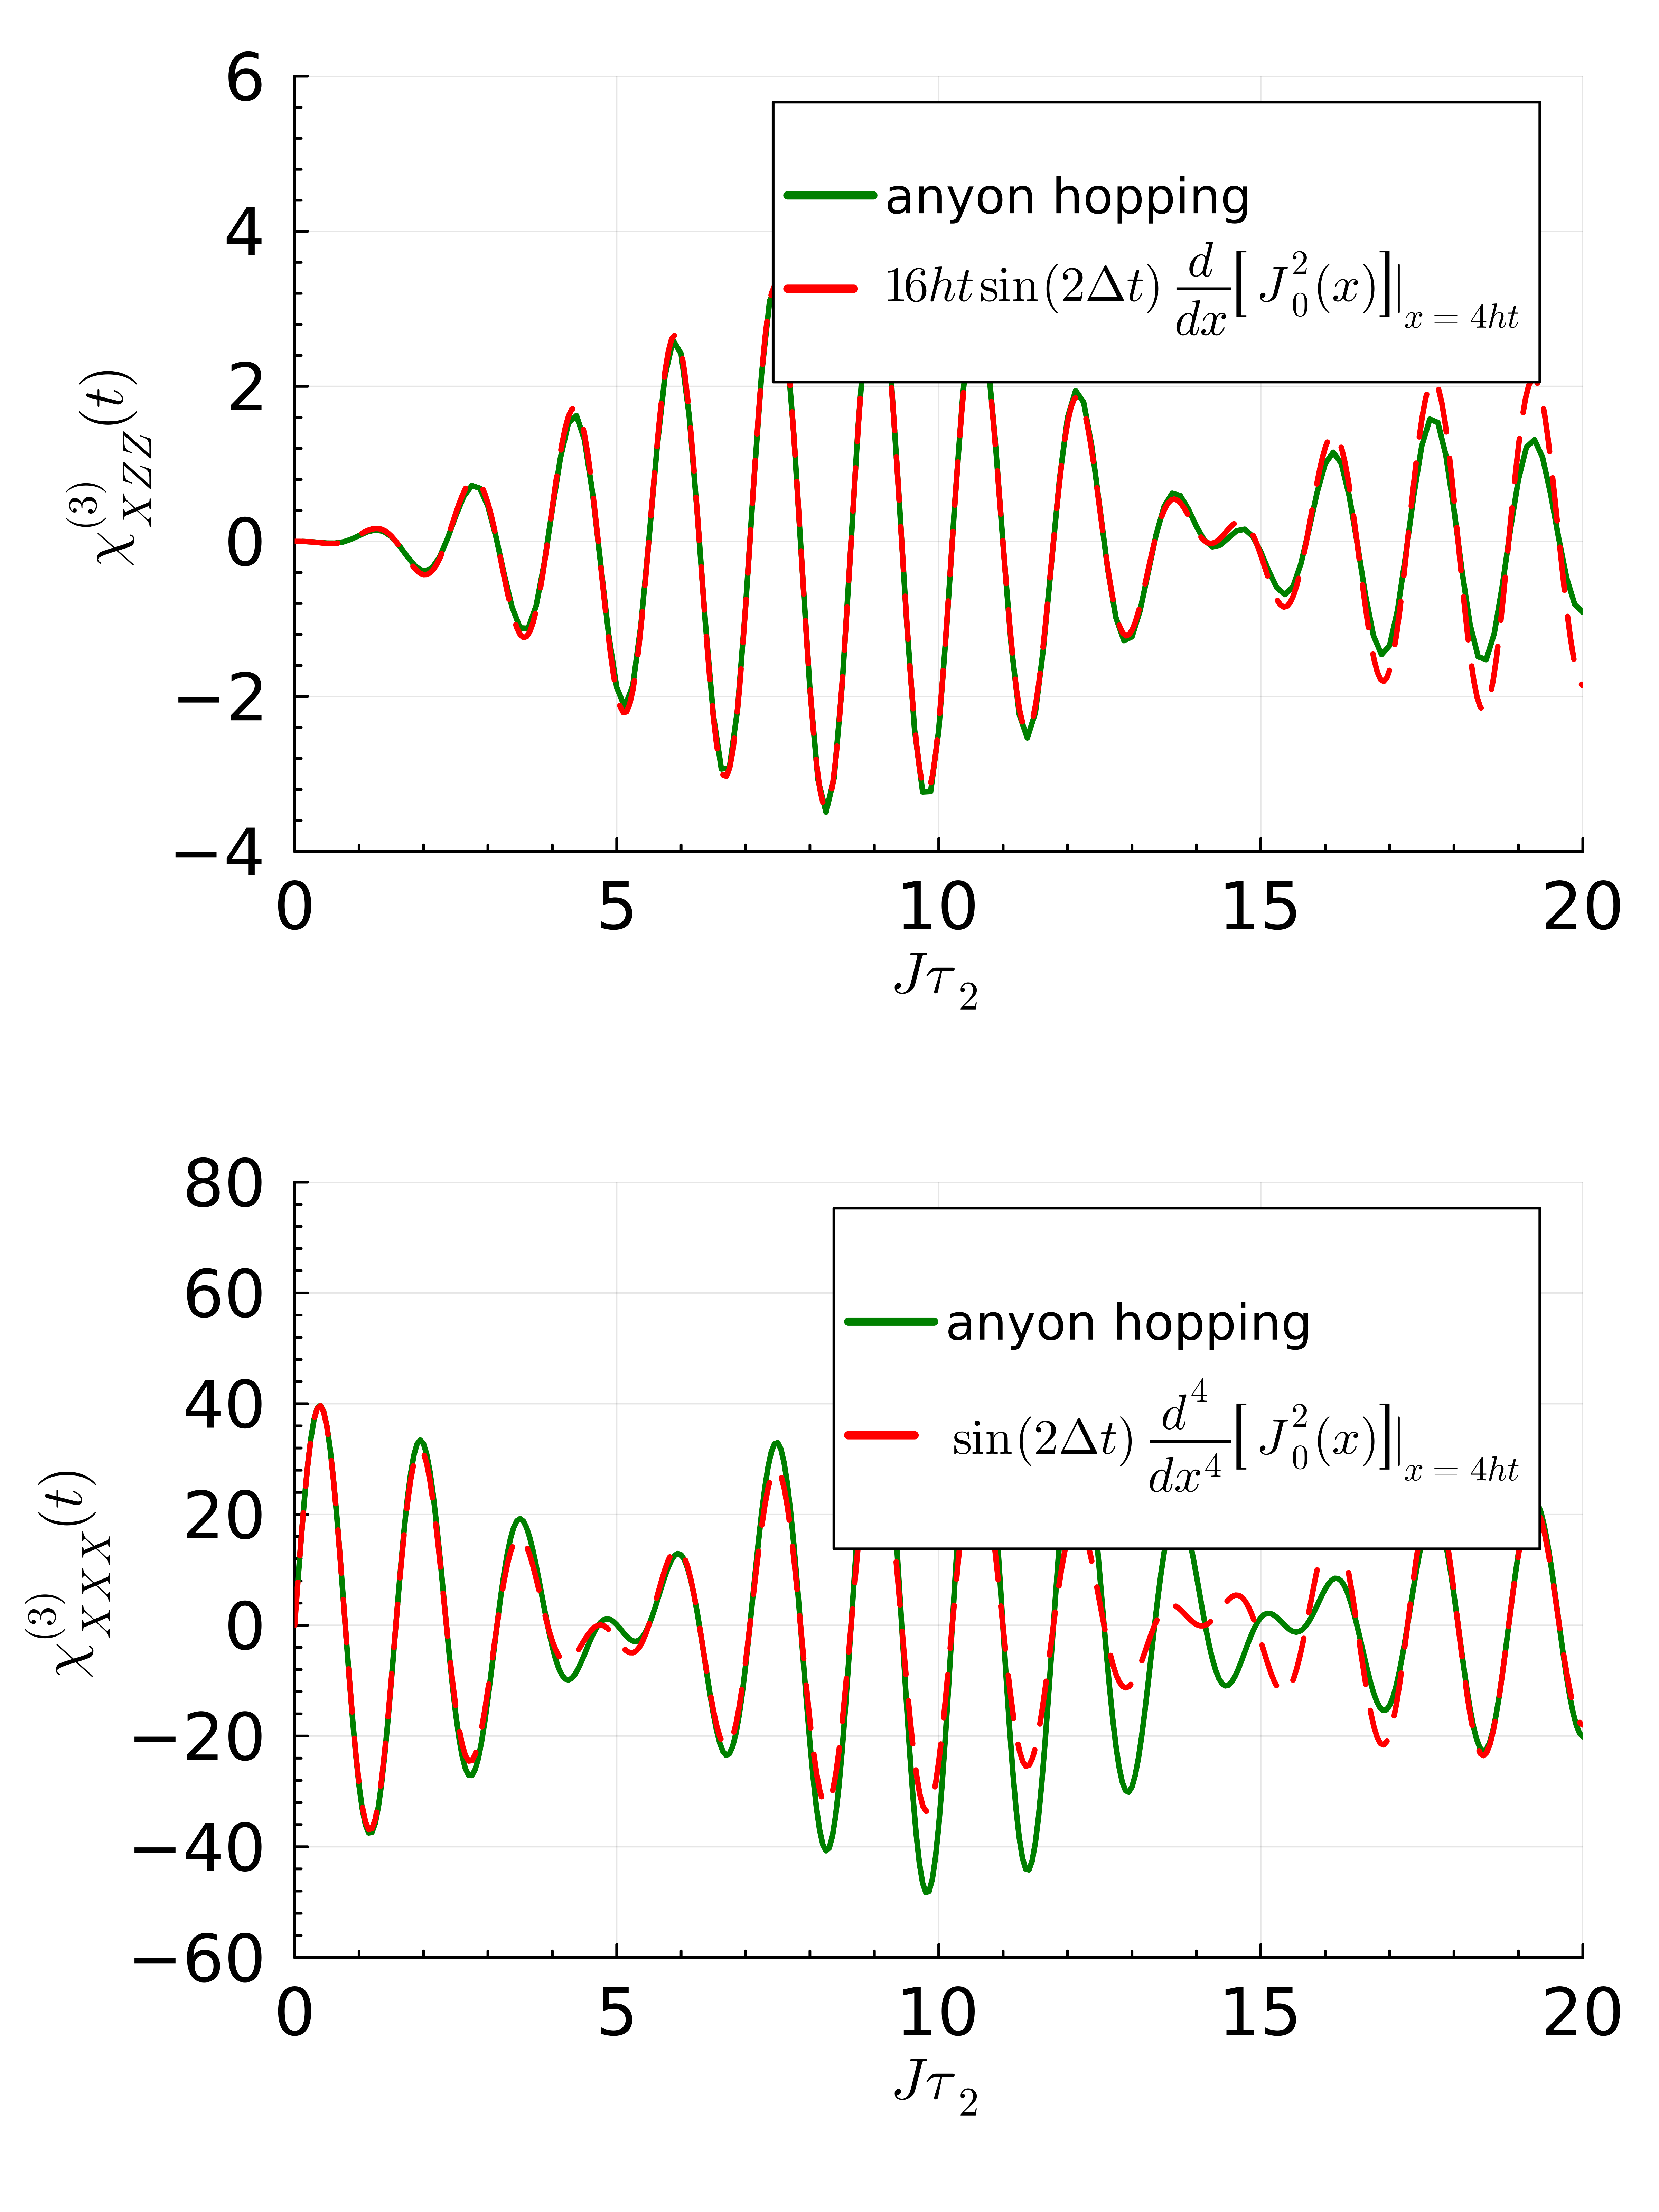

In [7]:
# Define the function J_0^2(x) and derivatives
J0(x) = besselj(0, x)*besselj(0, x)
dJ0(x) = ForwardDiff.derivative(J0, x)
d2J0(x) = ForwardDiff.derivative(dJ0, x) 
d3J0(x) = ForwardDiff.derivative(d2J0, x)
d4J0(x) = ForwardDiff.derivative(d3J0, x)

## Compute Bessel function forms for χ³
tarr = range(0, 100, length=2000);
h = 0.042; dJ0_arr =  16h .* tarr .* sin.(4 .* tarr) .* dJ0.(4h .* tarr);
h = 0.05; d4J0_arr = 160/9 .* d4J0.(4h .* tarr) .* sin.(4 .* tarr);

## Load data
tarr_XZZ_a_big, chi3_XZZ_a_big = load_object("Fig5/chi3_XZZ_anyon_15x15-torus.jld2");
tarr_XXX_a_big, chi3_XXX_a_big = load_object("Fig5/chi3_XXX_anyon_15x15-torus.jld2");

############################################

XZZ_bessel_plot = plot(tarr_XZZ_a_big, chi3_XZZ_a_big, label="anyon hopping", lw=2, lc = :green,
    xlabel=L"J\tau_2", xlims = (0,20), ylims = (-4,6),
    ylabel=L"\chi^{(3)}_{XZZ}(t)", legend=:topright, dpi=800,
)
plot!(tarr, dJ0_arr, label=L"16ht\sin(2\Delta t)\frac{d}{dx}\left[J_0^2(x)\right]\vert_{x=4ht}", linewidth=2, lw = 2, lc = :red, ls = :dash)

############################################

XXX_bessel_plot = plot(tarr_XXX_a_big, chi3_XXX_a_big, label="anyon hopping", lw=2,lc=:green,
    xlabel=L"J\tau_2",ylabel=L"\chi^{(3)}_{XXX}(t)",
    dpi=800, xlims = (0,20), ylims = (-60,80), legend = :topright
)
plot!(tarr, d4J0_arr, label=L"\sin(2\Delta t)\frac{d^4}{dx^4}\left[J_0^2(x)\right]\vert_{x=4ht}", lw=2, lc = :red, ls = :dash)

plot(XZZ_bessel_plot, XXX_bessel_plot, layout = (2,1), size = (600,800))

# Figure 6: Full Pump-Probe Response

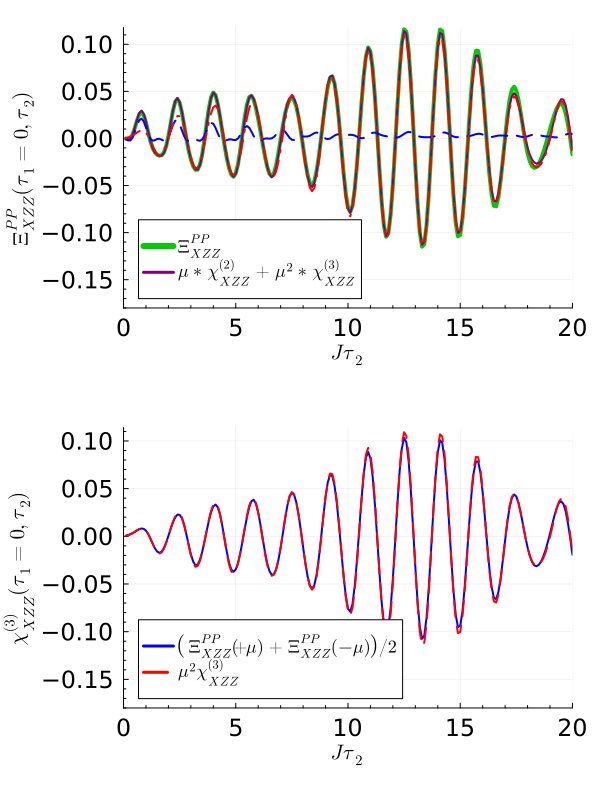

In [9]:
## Load data
tarr_XiPP, XiPP_arr, XiPP_alt_arr = load_object("Fig6/XiPP_ED.jld2"); μ=0.1
tarr_XZZ_ED, chi2_XZZ_ED = load_object("Fig8/chi2_XZZ_ED.jld2");

XiPP_plot = plot(tarr_XiPP, XiPP_arr, label = L"\Xi^{PP}_{XZZ}", lc = RGB(0.,0.8,0.), lw = 4, 
    xlabel = L"J\tau_2", xlims = (0,20),
    ylabel = L"\Xi^{PP}_{XZZ}(\tau_1=0,\tau_2)", ylims = (-0.18,:auto),
    titlefontsize = 12,
    legend = :bottomleft,
    margins = 5mm
)
plot!(tarr_XZZ_ED, μ .* chi2_XZZ_ED .+ μ^2 .* chi3_XZZ_ED,
    label = L"\mu*\chi^{(2)}_{XZZ} + \mu^2*\chi^{(3)}_{XZZ}",
    lc = :purple, lw = 2, 
)
plot!(tarr_XZZ_ED, μ .* chi2_XZZ_ED, label = "",
  #  label = L"\mu*\chi^{(2)}_{XZZ}",
    lc = :blue, lw = 2, ls = :dash
)
plot!(tarr_XZZ_ED, μ^2 .* chi3_XZZ_ED, label = "",
  #  label = L"\mu^2*\chi^{(3)}_{XZZ}",
    lc = :red, lw = 2, ls = :dashdot
)

############################################

chi2_removed = plot(tarr_XiPP, (XiPP_arr.+XiPP_alt_arr)./2, 
    label = L"\left(\Xi^{PP}_{XZZ}(+\mu) + \Xi^{PP}_{XZZ}(-\mu)\right)/2", lw = 2, lc = :blue, 
    xlabel = L"J\tau_2", ylabel = L"\chi^{(3)}_{XZZ}(\tau_1=0,\tau_2)", 
    ylims = (-0.18, :auto), xlims = (0,20),
    legend = :bottomleft,
)
plot!(tarr_XZZ_ED,  μ^2 .* chi3_XZZ_ED, 
    label = L"\mu^2\chi^{(3)}_{XZZ}", lw = 2, ls = :dash, lc = :red
)

plot(XiPP_plot, chi2_removed, layout = (2,1), size = (600,800))

# Figure 7: Polarized Toric Code

A, Δ = [1.219142114804675, 2.6255558167545376]
XZZ: A, B, Δ, φ = [2.418, 11.123, 2.635, -1.038]
XXX: A, B, Δ, φ = [2.846, 11.677, 2.628, -0.904]


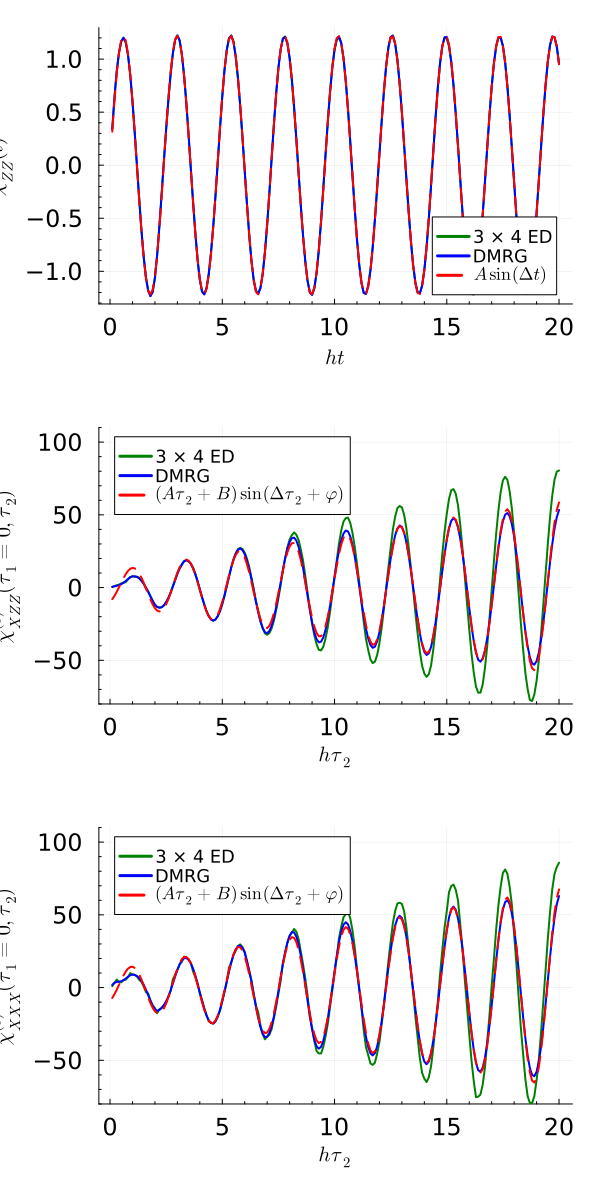

In [11]:
## Load data
tarr_lin_ED, lin_ED = load_object("Fig7/polarized_TC_ED_linear.jld2");
tarr_lin_DMRG, lin_DMRG = load_object("Fig7/polarized_TC_DMRG_linear.jld2");

tarr_xxx_ED, xxx_ED = load_object("Fig7/polarized_TC_ED_XXX.jld2");
tarr_xxx_DMRG, xxx_DMRG = load_object("Fig7/polarized_TC_DMRG_XXX.jld2");

tarr_xzz_ED, xzz_ED = load_object("Fig7/polarized_TC_ED_XZZ.jld2");
tarr_xzz_DMRG, xzz_DMRG = load_object("Fig7/polarized_TC_DMRG_XZZ.jld2");

############################################

pol_TC_lin_plot = plot(tarr_lin_ED, lin_ED, label = "3 × 4 ED",
    lc = :green, lw = 2,
    xlabel = L"ht",
    ylabel = L"\chi^{(1)}_{ZZ}(t)",
    legend = :bottomright
)
plot!(tarr_lin_DMRG, lin_DMRG, label = "DMRG", lw = 2, lc = :blue,)

## Fit to Asin(Δt)
sinfit(x,c) = c[1].*sin.(c[2].*x);
pol_lin_fit = curve_fit(sinfit, tarr_lin_DMRG, lin_DMRG,[1.2,2.6]);

println("A, Δ = ", pol_lin_fit.param)
plot!(tarr_lin_DMRG, sinfit(tarr_lin_DMRG,pol_lin_fit.param), label = L"A\sin(\Delta t)", 
    lw = 2, lc = :red, ls = :dash
)

############################################

pol_TC_XZZ_plot = plot(tarr_xzz_ED, xzz_ED, label = "3 × 4 ED",
    lc = :green, lw = 2,
    xlabel = L"h\tau_2",
    ylabel = L"\chi^{(3)}_{XZZ}(\tau_1=0,\tau_2)", ylims = (-80,110)
)
plot!(tarr_xzz_DMRG, xzz_DMRG, label = "DMRG", lw = 2, lc = :blue)

## Fit to (At+B)*sin(Δt+φ)
tsinfit(x,c) = (c[1] .* x .+ c[2]) .* sin.(c[3] .* x .+ c[4]);
xzpol_fit = curve_fit(tsinfit, tarr_xzz_DMRG, xzz_DMRG, [1., 1., 2.6, 0.]);

println("XZZ: A, B, Δ, φ = ", round.(xzpol_fit.param, digits=3))
plot!(tarr_xzz_DMRG, tsinfit(tarr_xzz_DMRG, xzpol_fit.param), label = L"(A\tau_2+B)\sin(\Delta \tau_2+\varphi)", lw = 2, ls = :dash, lc = :red)

############################################

pol_TC_XXX_plot = plot(tarr_xxx_ED, xxx_ED, label = "3 × 4 ED",
    lc = :green, lw = 2,
    xlabel = L"h\tau_2",
    ylabel = L"\chi^{(3)}_{XXX}(\tau_1=0,\tau_2)",ylims = (-80,110),
)
plot!(tarr_xxx_DMRG, xxx_DMRG, label = "DMRG", lw = 2, lc = :blue)

## Fit to (At+B)*sin(Δt+φ)
xxpol_fit = curve_fit(tsinfit, tarr_xxx_DMRG, xxx_DMRG, [1., 1., 2.6, 0.]);

println("XXX: A, B, Δ, φ = ",round.(xxpol_fit.param, digits=3))
plot!(tarr_xxx_DMRG, tsinfit(tarr_xxx_DMRG, xxpol_fit.param), label = L"(A\tau_2+B)\sin(\Delta \tau_2 + \varphi)", lw = 2, ls = :dash, lc = :red)

plot(pol_TC_lin_plot, pol_TC_XZZ_plot, pol_TC_XXX_plot, layout = (3,1), size = (600,1200))

# Figure 8: 2nd-Order Response

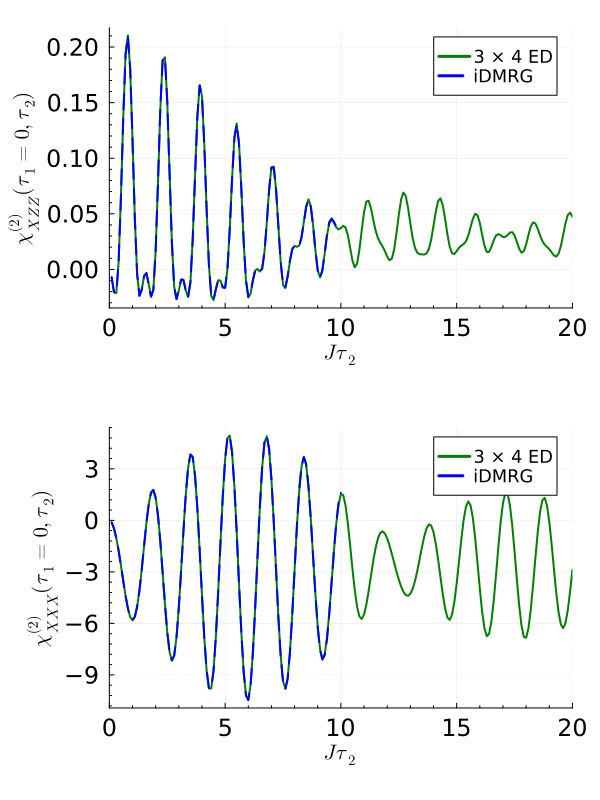

In [13]:
## Load data
tarr_XZZ_ED, chi2_XZZ_ED = load_object("Fig8/chi2_XZZ_ED.jld2");
tarr_XZZ_DMRG, chi2_XZZ_DMRG = load_object("Fig8/chi2_XZZ_DMRG.jld2");

tarr_XXX_ED, chi2_XXX_ED = load_object("Fig8/chi2_XXX_ED.jld2");
tarr_XXX_DMRG, chi2_XXX_DMRG = load_object("Fig8/chi2_XXX_DMRG.jld2");

############################################

chi2_XZZ_plot = plot(tarr_XZZ_ED, chi2_XZZ_ED, label = "3 × 4 ED", lw = 2, lc = :green,
    xlabel = L"J\tau_2", xlims = (0,20),
    ylabel = L"\chi^{(2)}_{XZZ}(\tau_1=0,\tau_2)",
    legend = :topright
)
plot!(tarr_XZZ_DMRG, chi2_XZZ_DMRG, label = "iDMRG", lw = 2, lc = :blue, ls = :dash)

############################################

chi2_XXX_plot = plot(tarr_XXX_ED, chi2_XXX_ED, label = "3 × 4 ED", lw = 2, lc = :green,
    xlabel = L"J\tau_2", xlims = (0,20),
    ylabel = L"\chi^{(2)}_{XXX}(\tau_1=0,\tau_2)",
    legend = :topright
)
plot!(tarr_XXX_DMRG, chi2_XXX_DMRG, label = "iDMRG", lw = 2, lc = :blue, ls = :dash)

plot(chi2_XZZ_plot, chi2_XXX_plot, layout = (2,1), size = (600,800))

# Figure 9: Polarized TFIM

A, Δ = [1.261929647875334, 1.5765151250484974]
A, B, Δ, φ = [2.403, 11.954, 1.58, -1.164]


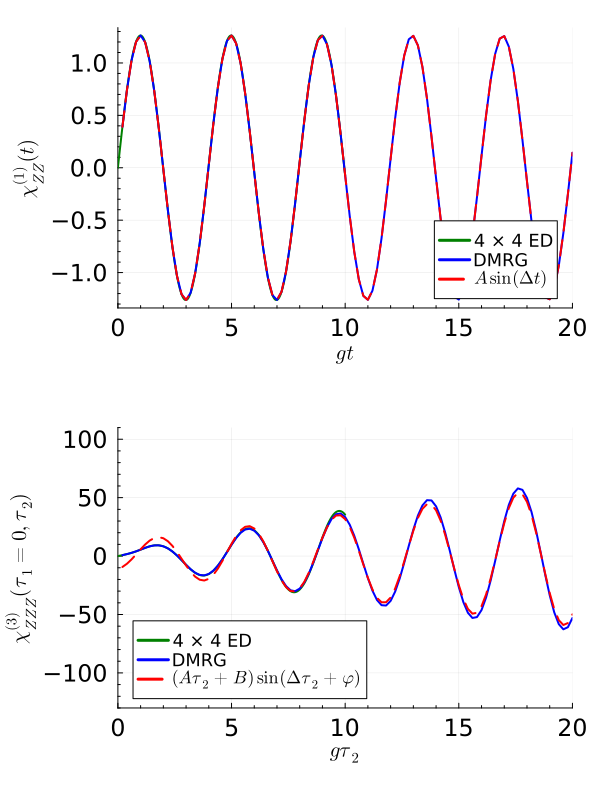

In [15]:
## Load data
tarr_lin_ED, lin_ED = load_object("Fig9/polarized_TFIM_ED_linear.jld2");
tarr_lin_DMRG, lin_DMRG = load_object("Fig9/polarized_TFIM_DMRG_linear.jld2");

tarr_ZZZ_ED, ZZZ_ED = load_object("Fig9/polarized_TFIM_ED_ZZZ.jld2");
tarr_ZZZ_DMRG, ZZZ_DMRG = load_object("Fig9/polarized_TFIM_DMRG_ZZZ.jld2");

############################################

tfim_lin_plot = plot(tarr_lin_ED, lin_ED, label = "4 × 4 ED",
    xlabel = L"gt", xlims = (0,20),
    ylabel = L"\chi^{(1)}_{ZZ}(t)",
    lw = 2, lc = :green,
    legend = :bottomright
)
plot!(tarr_lin_DMRG, lin_DMRG, label = "DMRG",
    lw = 2, lc = :blue
)

## Fit to Asin(Δt)
tfim_lin_fit = curve_fit(sinfit, tarr_lin_DMRG, lin_DMRG,[1., 1.6]);

println("A, Δ = ", tfim_lin_fit.param)
plot!(tarr_lin_DMRG, sinfit(tarr_lin_DMRG, tfim_lin_fit.param), label = L"A\sin(\Delta t)", lw = 2, ls = :dash, lc = :red)

############################################

tfim_chi3_plot = plot(tarr_ZZZ_ED, ZZZ_ED, label = "4 × 4 ED",
    xlabel = L"g\tau_2", xlims = (0,20),
    ylabel = L"\chi^{(3)}_{ZZZ}(\tau_1=0, \tau_2)", ylims = (-130,110),
    lw = 2, lc = :green,
    legend = :bottomleft
)
plot!(tarr_ZZZ_DMRG, ZZZ_DMRG, label = "DMRG",
    lw = 2, lc = :blue
)

## Fit to (At+B)sin(Δt+φ)
tfim_ZZZ_fit = curve_fit(tsinfit, tarr_ZZZ_DMRG, ZZZ_DMRG, [1., 1., 1.6, 0.]);
println("A, B, Δ, φ = ", round.(tfim_ZZZ_fit.param, digits=3))
plot!(tarr_ZZZ_DMRG, tsinfit(tarr_ZZZ_DMRG, tfim_ZZZ_fit.param), label = L"(A \tau_2 + B) \sin(\Delta \tau_2 + \varphi)", ls = :dash, lw = 2, lc = :red)

plot(tfim_lin_plot, tfim_chi3_plot, layout = (2,1), size = (600,800))

# Figure 10: Toric Code Spectra

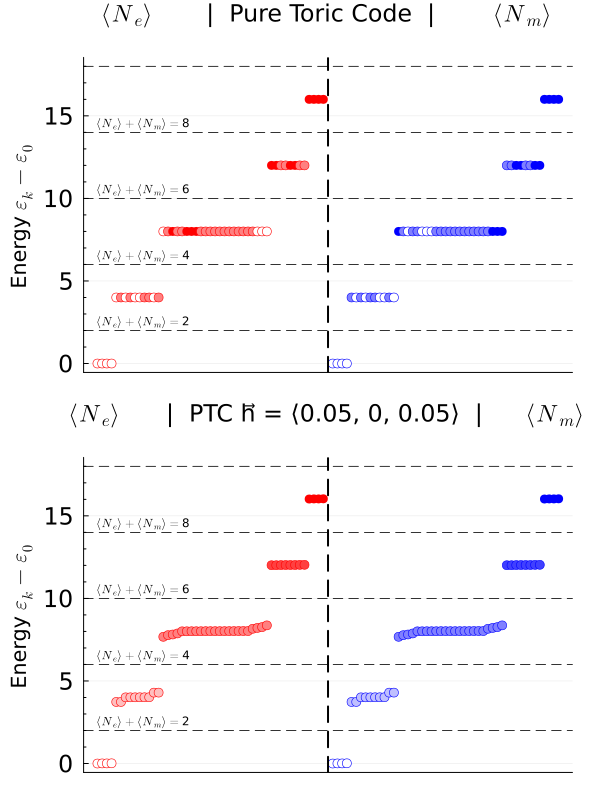

In [17]:
## Load data
pure_εk, pure_nA, pure_nB = load_object("Fig10/pure_TC_spectrum.jld2"); L = 2;
pert_εk, pert_nA, pert_nB = load_object("Fig10/perturbed_TC_spectrum.jld2");

############################################

pure_plot = plot(title = L"\langle N_e \rangle"*"       |  Pure Toric Code  |        "*L"\langle N_m \rangle",
    ylabel = "Energy "*L"\varepsilon_k - \varepsilon_0",
    xticks = :none
)
for j = 1:length(pure_εk)
    Acolor = RGB(1., 1. -pure_nA[j]/L^2, 1. -pure_nA[j]/L^2);
    Bcolor = RGB(1. -pure_nB[j]/L^2, 1. -pure_nB[j]/L^2, 1.);

    scatter!([j], [pure_εk[j]-pure_εk[1]], m = 5, lw = 2., mc = Acolor, markerstrokecolor=:red, markerstrokewidth=0.5, lc = Acolor, label = "")
    scatter!([length(pure_εk)+j+1], [pure_εk[j]-pure_εk[1]], m = 5, lw = 2., mc = Bcolor, markerstrokecolor=:blue, markerstrokewidth=0.5, lc = Bcolor, label = "")
end
vline!([length(pure_εk)+1], lw = 2, lc = :black, ls = :dash, label = "")

nmax = 4;
Earr = 4 .*collect(0:nmax).+2;
[annotate!(1, Earr[j]+0.5, text(L"\langle N_e \rangle + \langle N_m \rangle = "*"$(2j)", :left, 8)) for j=1:nmax]
hline!(Earr, lw = 0.8, ls = :dash, lc = :black, label = "")

############################################

pert_plot = plot(title = L"\langle N_e \rangle"*"      |  PTC h⃗ = ⟨0.05, 0, 0.05⟩  |      "*L"\langle N_m \rangle",
    ylabel = "Energy "*L"\varepsilon_k - \varepsilon_0",
    xticks = :none
)
for j = 1:length(pert_εk)
    Acolor = RGB(1., 1. -pert_nA[j]/L^2, 1. -pert_nA[j]/L^2);
    Bcolor = RGB(1. -pert_nB[j]/L^2, 1. -pert_nB[j]/L^2, 1.);

    scatter!([j], [pert_εk[j]-pert_εk[1]], m = 5, lw = 2., mc = Acolor, markerstrokecolor=:red, markerstrokewidth=0.5, lc = Acolor, label = "")
    scatter!([length(pert_εk)+j+1], [pert_εk[j]-pert_εk[1]], m = 5, lw = 2., mc = Bcolor, markerstrokecolor=:blue, markerstrokewidth=0.5, lc = Bcolor, label = "")
end
vline!([length(pert_εk)+1], lw = 2, lc = :black, ls = :dash, label = "")

[annotate!(1, Earr[j]+0.5, text(L"\langle N_e \rangle + \langle N_m \rangle = "*"$(2j)", :left, 8)) for j=1:nmax]
hline!(Earr, lw = 0.8, ls = :dash, lc = :black, label = "")

plot(pure_plot, pert_plot, layout = (2,1), size = (600,800))

# Figure 11: Toric Code 2DCS

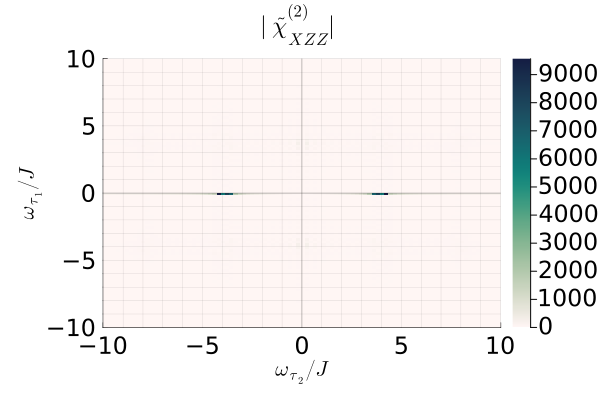

In [19]:
## Load data
data = load_object("Fig11/chi2_XZZ_2d.jld2");
tarr = real(data[1]);
chi_arr = data[2];

## extend data to negative τ₁, τ₂ to smooth Fourier transform
tarr_ext = cat(-reverse(tarr[2:end]), tarr, dims=1);
chi_ext = cat(conj(reverse(chi_arr[:,2:end], dims=2)), chi_arr, dims=2)
chi_ext = cat((reverse(chi_ext[2:end,:], dims=1)), chi_ext, dims=1);

## Compute Fourier transform and Fourier frequencies
dt = tarr[2] - tarr[1];
warr = fftshift(fftfreq(length(tarr_ext), 2π/dt));
farr = fftshift(fft(imag(chi_ext)));

lim = 10; clim = maximum(abs.(farr));
heatmap(warr, warr, abs.(farr), 
    xlabel = L"\omega_{\tau_2}/J",
    ylabel = L"\omega_{\tau_1}/J",
    title = L"|\tilde \chi^{(2)}_{XZZ}|", titlefontsize=16,
    c = :tempo, rightmargin = 8mm,
    xlims = (-lim,lim), ylims = (-lim,lim),
    clims = (0,clim), 
)
vline!([-10:10], label = "", lw = 0.3, lc = RGBA(0., 0., 0., 0.2))
vline!([0], label = "", lw = 0.5, lc = RGBA(0., 0., 0., 0.4))
hline!([-10:10], label = "", lw = 0.3, lc = RGBA(0., 0., 0., 0.2))
hline!([0], label = "", lw = 0.5, lc = RGBA(0., 0., 0., 0.4))

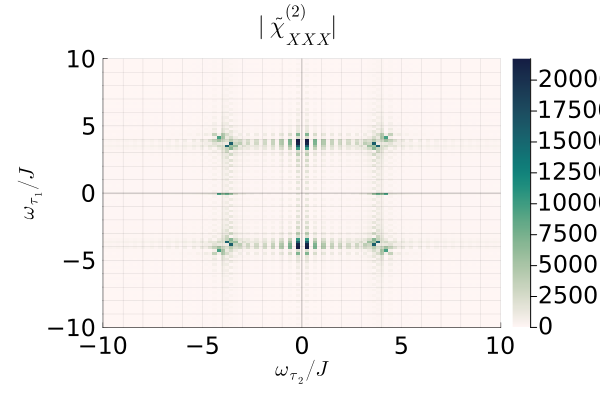

In [20]:
## Load data
data = load_object("Fig11/chi2_XXX_2d.jld2");
tarr = real(data[1]);
chi_arr = data[2];

## extend data to negative τ₁, τ₂ to smooth Fourier transform
tarr_ext = cat(-reverse(tarr[2:end]), tarr, dims=1);
chi_ext = cat(conj(reverse(chi_arr[:,2:end], dims=2)), chi_arr, dims=2)
chi_ext = cat((reverse(chi_ext[2:end,:], dims=1)), chi_ext, dims=1);

## Compute Fourier transform and Fourier frequencies
dt = tarr[2] - tarr[1];
warr = fftshift(fftfreq(length(tarr_ext), 2π/dt));
farr = fftshift(fft(imag(chi_ext)));

lim = 10; clim = maximum(abs.(farr));
heatmap(warr, warr, abs.(farr), 
    xlabel = L"\omega_{\tau_2}/J",
    ylabel = L"\omega_{\tau_1}/J",
    title = L"|\tilde \chi^{(2)}_{XXX}|", titlefontsize=16,
    c = :tempo, rightmargin = 8mm,
    xlims = (-lim,lim), ylims = (-lim,lim),
    clims = (0,clim), 
)
vline!([-10:10], label = "", lw = 0.3, lc = RGBA(0., 0., 0., 0.2))
vline!([0], label = "", lw = 0.5, lc = RGBA(0., 0., 0., 0.4))
hline!([-10:10], label = "", lw = 0.3, lc = RGBA(0., 0., 0., 0.2))
hline!([0], label = "", lw = 0.5, lc = RGBA(0., 0., 0., 0.4))

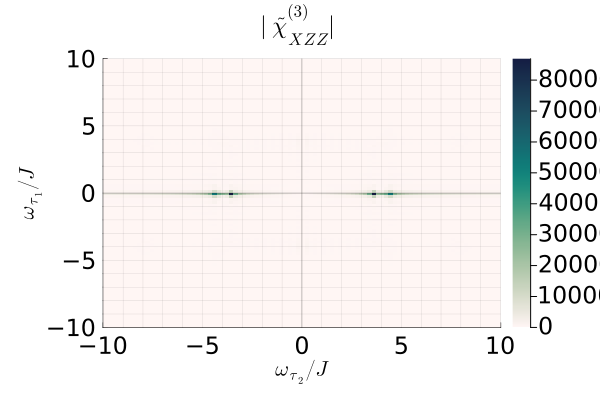

In [21]:
## Load data
data = load_object("Fig11/chi3_XZZ_2d.jld2");
tarr = real(data[1]);
chi_arr = data[2];

## extend data to negative τ₁, τ₂ to smooth Fourier transform
tarr_ext = cat(-reverse(tarr[2:end]), tarr, dims=1);
chi_ext = cat(conj(reverse(chi_arr[:,2:end], dims=2)), chi_arr, dims=2)
chi_ext = cat((reverse(chi_ext[2:end,:], dims=1)), chi_ext, dims=1);

## Compute Fourier transform and Fourier frequencies
dt = tarr[2] - tarr[1];
warr = fftshift(fftfreq(length(tarr_ext), 2π/dt));
farr = fftshift(fft(imag(chi_ext)));

lim = 10; clim = maximum(abs.(farr));
heatmap(warr, warr, abs.(farr), 
    xlabel = L"\omega_{\tau_2}/J",
    ylabel = L"\omega_{\tau_1}/J",
    title = L"|\tilde \chi^{(3)}_{XZZ}|", titlefontsize=16,
    c = :tempo, rightmargin = 8mm,
    xlims = (-lim,lim), ylims = (-lim,lim),
    clims = (0,clim), 
)
vline!([-10:10], label = "", lw = 0.3, lc = RGBA(0., 0., 0., 0.2))
vline!([0], label = "", lw = 0.5, lc = RGBA(0., 0., 0., 0.4))
hline!([-10:10], label = "", lw = 0.3, lc = RGBA(0., 0., 0., 0.2))
hline!([0], label = "", lw = 0.5, lc = RGBA(0., 0., 0., 0.4))

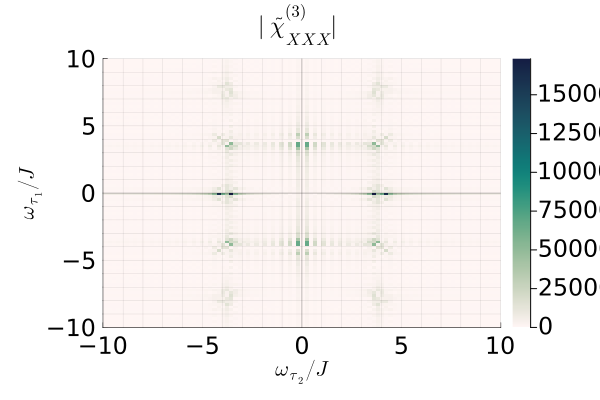

In [22]:
## Load data
data = load_object("Fig11/chi3_XXX_2d.jld2");
tarr = real(data[1]);
chi_arr = data[2];

## extend data to negative τ₁, τ₂ to smooth Fourier transform
tarr_ext = cat(-reverse(tarr[2:end]), tarr, dims=1);
chi_ext = cat(conj(reverse(chi_arr[:,2:end], dims=2)), chi_arr, dims=2)
chi_ext = cat((reverse(chi_ext[2:end,:], dims=1)), chi_ext, dims=1);

## Compute Fourier transform and Fourier frequencies
dt = tarr[2] - tarr[1];
warr = fftshift(fftfreq(length(tarr_ext), 2π/dt));
farr = fftshift(fft(imag(chi_ext)));

lim = 10; clim = maximum(abs.(farr));
heatmap(warr, warr, abs.(farr), 
    xlabel = L"\omega_{\tau_2}/J",
    ylabel = L"\omega_{\tau_1}/J",
    title = L"|\tilde \chi^{(3)}_{XXX}|", titlefontsize=16,
    c = :tempo, rightmargin = 8mm,
    xlims = (-lim,lim), ylims = (-lim,lim),
    clims = (0,clim), 
)
vline!([-10:10], label = "", lw = 0.3, lc = RGBA(0., 0., 0., 0.2))
vline!([0], label = "", lw = 0.5, lc = RGBA(0., 0., 0., 0.4))
hline!([-10:10], label = "", lw = 0.3, lc = RGBA(0., 0., 0., 0.2))
hline!([0], label = "", lw = 0.5, lc = RGBA(0., 0., 0., 0.4))